In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [6]:
filename = list(uploaded.keys())[0]

data= pd.read_csv(filename, encoding='latin1')
data.head()
x = data['no2'].dropna().values

/tmp/ipython-input-1608991926.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv(filename, encoding='latin1')


In [7]:
r = 102303768
a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

In [8]:

z = x + a_r * np.sin(b_r * x)

mu = np.mean(z)

sigma_sq = np.var(z)

lam = 1 / (2 * sigma_sq)
c = np.sqrt(lam / np.pi)


In [9]:
print("===== FINAL PARAMETERS =====")
print(f"μ (mu)     = {mu:.6f}")
print(f"λ (lambda) = {lam:.6f}")
print(f"c          = {c:.6f}")



===== FINAL PARAMETERS =====
μ (mu)     = 25.809623
λ (lambda) = 0.001460
c          = 0.021561


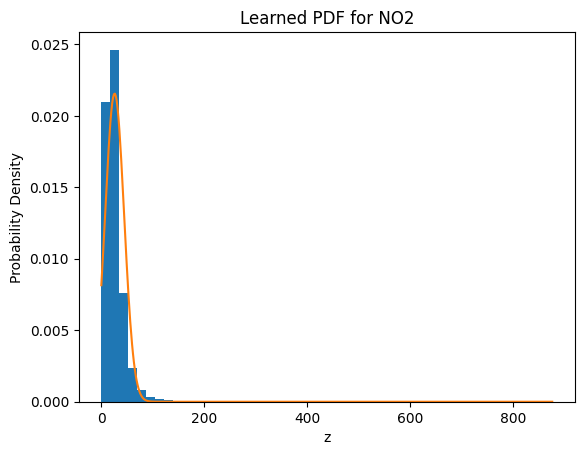

In [10]:

z_range = np.linspace(z.min(), z.max(), 500)
pdf = c * np.exp(-lam * (z_range - mu)**2)

plt.figure()
plt.hist(z, bins=50, density=True)
plt.plot(z_range, pdf)
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Learned PDF for NO2")
plt.show()
